<a href="https://colab.research.google.com/github/MarianaCM004/Analitica-de-Negocios/blob/main/Reto_2_Tech_Sale_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad**
Implementar un modelo basado en los principios de los Árboles de Decisión para determinar si un empleado posee título universitario o no (College: Yes – 1, No - 0), tomando como referencia un total 8 variables socioeconómicas sin incluir la variable personalidad. Para la variable de Business tomar como Hardware:0 y para Software: 1.

**0**. Se procede con la carga de las librerias de


In [ ]:
import pandas as pd #ESTA LIBRERIA TIENE LAS FUNCIONES NUMERICAS
import numpy as np #Esta libreria se encarga de conectarme el excel con el colab

from sklearn.tree import DecisionTreeClassifier #Para crear el arbol de decisión
from sklearn.metrics import confusion_matrix #Para analizar el modelo

 1. Se procede con la carga de la base de datos

In [ ]:
data = '/content/2. TechSalesReport_Int_L.xlsx'
XDB = pd.read_excel(data, sheet_name=0) #XDB=XDATABASE

# Convertir 'Business' y 'College' a valores numéricos
XDB['Business'] = XDB['Business'].map({'Hardware': 0, 'Software': 1})

XDB['College'] = XDB['College'].map({'No': 0, 'Yes': 1})

XDB.head(100) #Muestra 100 datos
#XDB ES SOLO LA TABLA DE EXCEL

,Sales_Rep,Business,Age,Female,Years,College,Personality,Certificates,Feedback,Salary,NPS
0,1,0,59,1,2,1,Diplomat,1,2.01,70200,5
1,2,0,52,0,10,1,Diplomat,4,3.64,133000,10
2,3,1,47,1,1,1,Explorer,1,3.88,52600,8
3,4,0,61,0,2,1,Diplomat,3,2.70,96000,6
4,5,1,39,0,1,0,Diplomat,5,3.44,122000,7
...,...,...,...,...,...,...,...,...,...,...,...
95,96,1,27,0,2,1,Analyst,4,1.58,41000,4
96,97,0,28,0,2,1,Sentinel,3,2.70,55000,4
97,98,0,46,1,1,1,Sentinel,6,3.34,86800,9
98,99,0,40,0,1,0,Sentinel,5,1.95,49000,6


#1.1
Llevar a cabo la descripción de cada una de las variables:

Esta es un set de datos que nos describe las caracteristicas de los vendedores de una empresa

**Sales_Rep** corresponde al vendedor, **Business** corresponde a el tipo de producto vendido, ya sea hardware (0) o software (1). **Age**, corresponde a la edad del vendedor, **Female** me indica si es hombre (0) o es mujer (1), **Years** corresponde a años en la empresa, **College** a si tiene titulo universitario (1) o no (0), **Personality** coresponde a la personalidad, **certificates** me indica cuantos certificados ha obtenido el vendedor, **Feedback** Corresponde al puntaje dado despues del servicio de ventas, **Salary** corresponde al salario del vendedor. **NPS** son las siglas de Net Promoter Score (puntuación neta del promotor), una métrica habitual en los programas de experiencia del cliente. La puntuación NPS mide la fidelidad de los clientes en función de la probabilidad de que recomienden una empresa determinada.



In [ ]:
#Seleccionamos las variables

XD = XDB[[ 'Business', 'Age', 'Female', 'Years', 'Certificates', 'Feedback', 'Salary', 'NPS']] #Vector donde invocamos variables que necesitamos

yd = XDB[['College']] #Vector de variable a analizar

#2.
Se procede con la implementación del modelo y tomamos máximo 4 niveles de análisis para la estructura del árbol de decisión.

In [ ]:
mar = DecisionTreeClassifier(criterion='gini', max_depth=4) #Mar = Modelo de arbol

mar.fit(XD, yd)

#Se procede con el despliegue del arbol
from sklearn.tree import export_graphviz #Para exportar
from pydotplus import graph_from_dot_data #Para crear gráfico

vs=['Business', 'Age', 'Female', 'Years', 'Certificates', 'Feedback', 'Salary', 'NPS']

dot_data = export_graphviz(mar, feature_names=vs)
graph = graph_from_dot_data(dot_data)
graph.write_png('1. arbolCollege.png')


True

#3.
Llevar a cabo la caracterización de la base de datos, total de personas, número de personas inscritas y número de personas no escritas.

In [ ]:
inscritas= XDB['College'].sum() #Sumamos valores que en columna 'college' tengan el numero 1
no_inscritas= (XDB['College'] == 0).sum() #Sumamos valores que en columna 'college' tengan el numero 0
total= len(XDB)

#Imprimimos los resultados
print("Personas inscritas:", inscritas)
print("Personas no inscritas", no_inscritas)
print("Total de personas inscritas:", total)

Personas inscritas: 17520
Personas no inscritas 4470
Total de personas inscritas: 21990


#4. No se encuentra ningun nodo puro

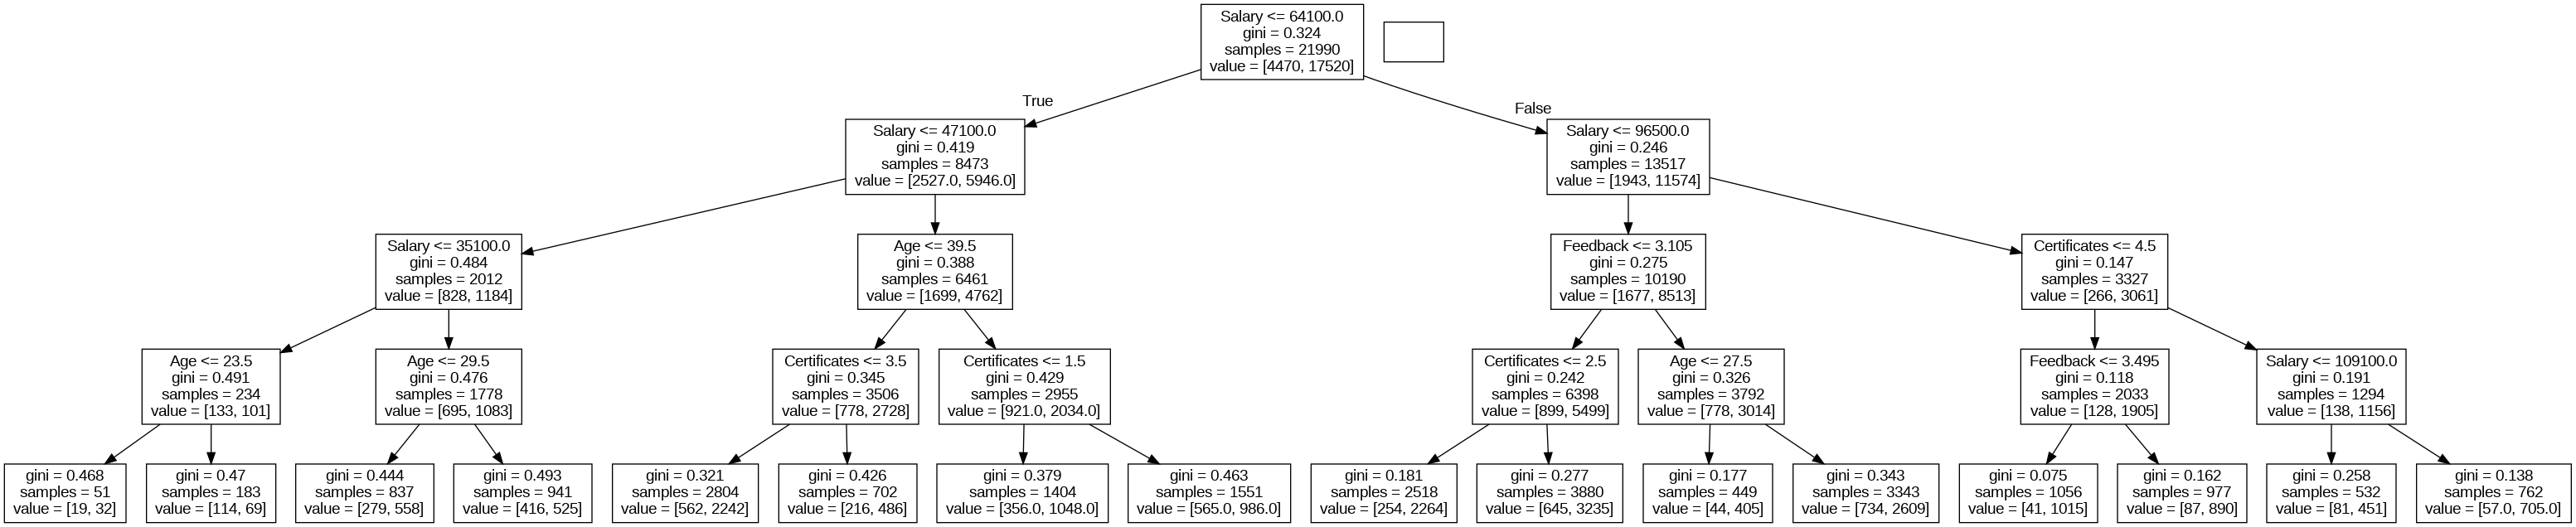

4. Desempeño del modelo

#5.
Llevar a cabo el pronóstico del título Universitario para las personas agrupadas en la base de datos de pronóstico.

In [ ]:
#Se selecciona la hoja 1 para realizar pronóstico
XDB2=pd.read_excel(data, sheet_name=1)
XDB2.head(100)

#Se convierte a nuemros los valores en la columna 'business'
XDB2['Business'] = XDB2['Business'].map({'Hardware': 0, 'Software': 1})

# Crear la columna 'College' con valores vacíos (NaN)
XDB2['College'] = np.nan

# Verificar que la columna se creó correctamente
print(XDB2)

yd2= XDB2 [['College']]

#Donde estan los que no poseen valor en college

filas=np.where((np.isnan(yd2))==True) [0]
print("Las filas que no poseen información:\n", filas)

#Se crea la tabla para el pronóstico de 'College' para estas personas
XD2=XDB2[['Business','Age','Female','Years','Certificates','Feedback','Salary','NPS']]
XD2 =XD2.iloc[filas,]

#Se hace el pronóstico
ydp2=mar.predict(XD2)
print("Las predicciones son:\n", ydp2)

#Crear el informe
dfpronostico= pd.DataFrame(np.column_stack((filas, XD2, ydp2)))
dfpronostico.columns=['Fila','Business','Age','Female','Years','Certificates','Feedback','Salary','NPS', 'College']
dfpronostico.head(10)
dfpronostico.to_excel('Informecollege.xlsx')

#Se imprimen los resultados del pronóstico
print("Las personas sin titulo son:", len(np.where(ydp2==0)[0]))
print("Los personas con titulo son:", len(np.where(ydp2==1)[0]))

    Sales_Rep  Business  Age  Female  Years Personality  Certificates  \
0           1         0   63       0      2    Sentinel             5   
1           2         1   38       1      2    Diplomat             4   
2           3         1   47       0      1     Analyst             2   
3           4         1   25       0      1    Explorer             2   
4           5         0   49       0     10    Explorer             4   
5           6         1   48       0      1    Diplomat             1   
6           7         1   25       1      1    Explorer             6   
7           8         0   39       0      1    Diplomat             2   
8           9         1   29       0      1    Explorer             5   
9          10         1   45       1      3    Diplomat             3   
10         11         0   35       0      6    Diplomat             1   
11         12         0   30       0      4    Diplomat             2   
12         13         1   28       0      1     Ana

#6.
Determinar las métricas de desempeño del modelo mediante la utilización de la matriz de confusión sobre el total de los datos.

In [ ]:
#Se crea la matriz de confusión
ydp=mar.predict(XD)
cm=confusion_matrix(yd, ydp)
print(cm)

VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]
print("VN:", VN)
print("FP:", FP)
print("FN:", FN)
print("VP:", VP)

Ex= (VN+VP)/(VN+FP+FN+VP)
print("La exactitud del modelo es:", Ex) #ESTO ME INDICA EL DESEMPEÑO GENERAL DEL MODELO.
#UNA CONCLUSION ES QUE PRONOSTICA MUY BIEN cerca del 80% DE LOS DATOS

Te= (FN+FP)/(VN+FP+FN+VP)
print("La tasa de error es:", Te) #Me indica cuanto se equivoca el modelo en general. En este caso se equivoca un 20% de los casos

Sen=VP/(VP+FN)
print("La sensibilidad del modelo es:", Sen) #Evaluamos el comportamiento del modelo, como se comporta con los universitarios

Esp=VN/(VN+FP)
print("La especificidad del modelo es:", Esp) #Evaluamos el comportamiento del modelo al predecir Cuales no son universitarios

pre=VP/(VP+FP)
print("La precisión del modelo es:", pre) #Cual es el acierto clasificando los universitarios. Es muy similar a la sensibilidad, Pero este es más usado ya que es más preciso

pren=VN/(VN+FN)
print("La precisión negativa del modelo es:", pren) #Evaluamos el comportamiento del modelo identificando los que no son universitarios. Es muy similar a la especificidad. Pero este es más usado ya que es mas preciso

print("Total de excatitud y tasa de error:", Ex+Te)

[[  114  4356]
 [   69 17451]]
VN: 114
FP: 4356
FN: 69
VP: 17451
La exactitud del modelo es: 0.7987721691678036
La tasa de error es: 0.20122783083219645
La sensibilidad del modelo es: 0.9960616438356165
La especificidad del modelo es: 0.025503355704697986
La precisión del modelo es: 0.8002476269087908
La precisión negativa del modelo es: 0.6229508196721312
Total de excatitud y tasa de error: 1.0


##**ESTADO DE RESULTADOS**

Para la implementación del modelo del arbol de decision se tomaron un total de 9 variables, 8 variables de entrada en la que se destacan Business', 'Age', 'Female', 'Years', 'Certificates', 'Feedback', 'Salary', 'NPS', y una variable de salida 'College', que nos permite evaluar si el representante de ventas tiene o no título universitario.

Para la construcción del modelo se tuvieron un total de 21990 personas donde  17520 cuantan con título universitario y 4420 no cuentan con título universitario.

Al implementar el modelo se identificó que no hay ningun nodo puro, lo que quiere decir que no podemos implementar una regla clara para identificar quienes poseen título universitario.

Luego de la ejecución del modelo se logró una exactitud cercana al 80% en promedio lo que está por encima del 75% requerido para la aceptación del mismo, lo que indica la calidad del modelo en el pronostico. Es importante destacar que el coeficiente de sensibilidad estuvo por encima del 75% (99%), mientras que la prediccion negativa se ubico por debajo del 75% (62%) lo que nos indica que el modelo en general es muy bueno pronosticando los que tienen titulo pero un poco ineficiente a la hora predecir aquellos que no cuentan con el titulo, esto mismo se corrobora con la falta de nodos puros.

Luego de la construcción del modelo se procedió con el pronostico. Se logró un informe para determinar aquellos con título universitario, en donde un total de personas sin titulo son 0 y un total de 16 cuentan con título universitario.
Este resultado de nuevo nos confirma que el modelo puede tener fallas a la hora de pronosticar aquellos que no cuentan con título.